## Analysis on discovery of hand washing

### To find the project click [here](https://app.datacamp.com/workspace/w/cb39c3d5-5d44-45a7-9dc4-0a313e2a5b14)
### Index (click to redirect to section)
- [Loading yearly data into a dictionary](#load-the-yearly-data)
- [Calculate proportion of deaths](#calculate-proportion-of-deaths)
- [Plot death proportions vs year](#plot-death-proportions-vs-year)
- [Load monthly data on deaths](#load-monthly-data-on-deaths)
- [Plot proportion of deaths vs date](#plot-proportion-of-deaths-vs-date)
- [Plot proportion of deaths vs date before and after 1847-06-01](#plot-proportion-of-deaths-vs-date-before-and-after-1847-06-01)
- [Difference in mean monthly proportion of deaths due to handwashing](#difference-in-mean-monthly-proportion-of-deaths-due-to-handwashing)
- [A bootstrap analysis](#a-bootstrap-analysis)
- [Conclusion](#conclusion)

<a id='load-the-yearly-data'></a>
#### Loading yearly data into a dictionary

In [6]:
# Importing modules
import pandas as pd
import numpy as np

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


<a id='calculate-proportion-of-deaths'></a>
#### Calculate proportion of deaths

In [8]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out clinic_1
print(clinic_1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


<a id='plot-death-proportions-vs-year'></a>
#### Plot death proportions vs year

<AxesSubplot:xlabel='year', ylabel='Proportion deaths'>

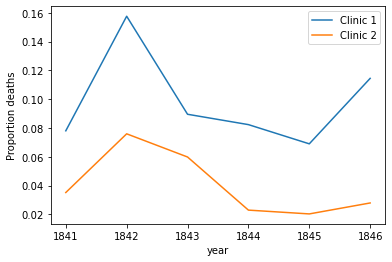

In [10]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="Clinic 1")
clinic_2.plot(x="year", y="proportion_deaths", label="Clinic 2",
              ax=ax, ylabel="Proportion deaths")

<a id='load-monthly-data-on-deaths'></a>
#### Load monthly data on deaths

In [14]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

# Print out the first rows in monthly
print(monthly.head())


        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


<a id='plot-proportion-of-deaths-vs-date'></a>
#### Plot proportion of deaths vs date

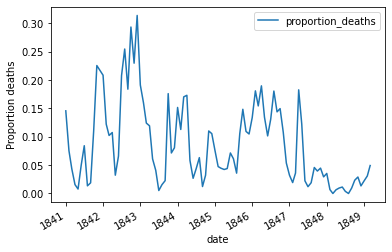

In [15]:
# Plot monthly proportion of deaths
ax = monthly.plot('date', 'proportion_deaths', ylabel='Proportion deaths')

<a id='plot-proportion-of-deaths-vs-date-before-and-after-1847-06-01'></a>
#### Plot proportion of deaths vs date before and after 1847-06-01

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

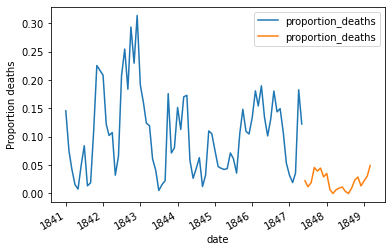

In [16]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot('date', 'proportion_deaths')
after_washing.plot('date', 'proportion_deaths',
                   ax=ax, ylabel='Proportion deaths')

<a id='difference-in-mean-monthly-proportion-of-deaths-due-to-handwashing'></a>
#### Difference in mean monthly proportion of deaths due to handwashing

In [17]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = np.mean(after_proportion) - np.mean(before_proportion)
mean_diff

-0.0839566075118334

<a id='a-bootstrap-analysis'></a>
#### A bootstrap analysis

In [18]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100607
0.975   -0.067491
dtype: float64

<a id='conclusion'></a>
#### Conclusion

In [20]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True